In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

from time_series_extractor import *
from SubjectMagicFeatures import *
from featureExtractor import *
from plots import *


In [26]:
mode = "sub"
print("================ MODE : {} ================".format(mode))
#features = extractAndSaveAll(out_file="features/all_{}.csv".format(mode), ref_to_base=True, mode="div")
features = pd.read_csv("features/all_{}.csv".format(mode), sep='\t')

================ MODE : sub ================


In [27]:
plot_column_names = [
        'subject',
        #'source',
        'duration',
        'card_class',
        #'show_order',
        'fix_freq','sacc_freq',
        'pd_right_mean','pd_right_std','pd_right_min','pd_right_max',
        'pd_left_mean','pd_left_std','pd_left_min','pd_left_max',
        'sre_fix_freq','sre_sacc_freq',
        'sre_pd_right_mean','sre_pd_right_std',
        'sre_pd_right_min','sre_pd_right_max',
        'sre_pd_left_mean','sre_pd_left_std',
        'sre_pd_left_min','sre_pd_left_max',
        'srl_fix_freq','srl_sacc_freq',
        'srl_pd_right_mean','srl_pd_right_std',
        'srl_pd_right_min','srl_pd_right_max',
        'srl_pd_left_mean','srl_pd_left_std',
        'srl_pd_left_min','srl_pd_left_max',
        'label'
    ]

feat_cols = [
        'duration',
        'fix_freq',
        'sacc_freq',
        'pd_right_mean',
        'pd_right_std',
        'pd_right_min',
        'pd_right_max',
        'pd_left_mean',
        'pd_left_std',
        'pd_left_min',
        'pd_left_max',
        'sre_fix_freq',
        'sre_sacc_freq',
        'sre_pd_right_mean',
        'sre_pd_right_std',
        'sre_pd_right_min',
        'sre_pd_right_max',
        'sre_pd_left_mean',
        'sre_pd_left_std',
        'sre_pd_left_min',
        'sre_pd_left_max',
        'srl_fix_freq',
        'srl_sacc_freq',
        'srl_pd_right_mean',
        'srl_pd_right_std',
        'srl_pd_right_min',
        'srl_pd_right_max',
        'srl_pd_left_mean',
        'srl_pd_left_std',
        'srl_pd_left_min',
        'srl_pd_left_max',
        'label'
    ]


def bigAggregation(features, sub, cols, aggrZeros, aggrOnes):
    data = features[cols].loc[features['subject'] == sub]
    zeros = data.loc[features['label'] == 0].drop(['card_class'], axis=1)
    ones = data.loc[features['label'] == 1]

    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
    zeros = zeros.head(1)
    zeros['card_class'] = "avg"
    
    aggrZeros = aggrZeros.append(zeros, ignore_index=True)
    aggrOnes = aggrOnes.append(ones, ignore_index=True)
    
    return aggrZeros, aggrOnes

In [28]:
aggrZeros = pd.DataFrame(columns=plot_column_names)
aggrOnes = pd.DataFrame(columns=plot_column_names)

markers=['o',',','v','^','<','>','8','s','p','P','*','h','H','+','x','X','D','d','|','_','1','2','3','4','.']
subjects = features.groupby('subject').count().index.values
subjects

for sub in subjects:
    aggrZeros, aggrOnes = bigAggregation(features, sub, plot_column_names, aggrZeros, aggrOnes)

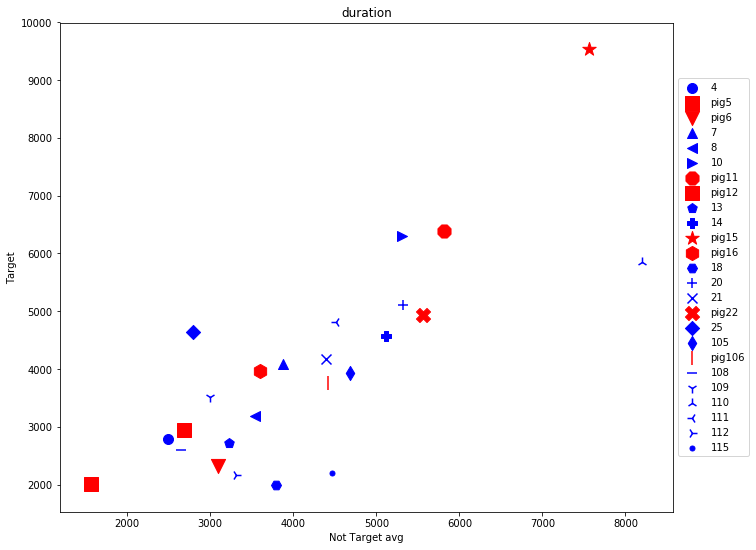

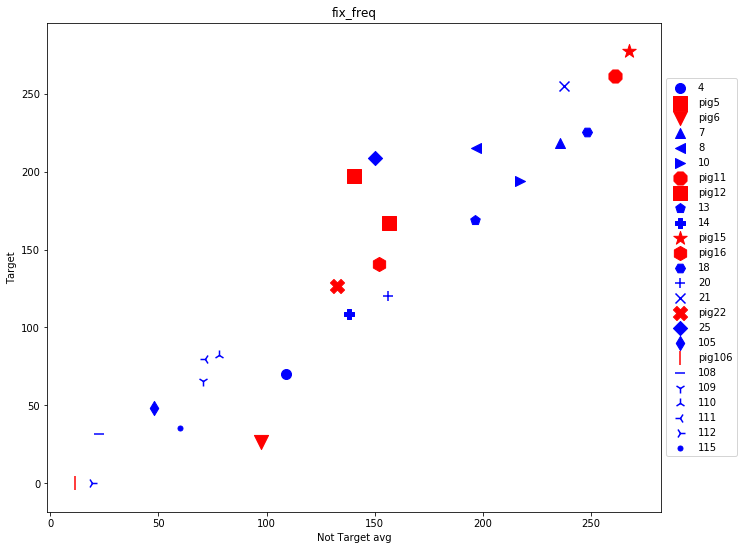

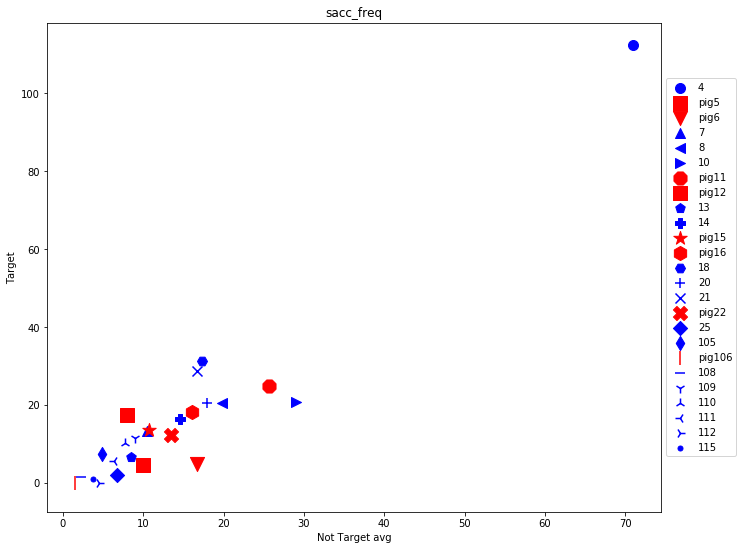

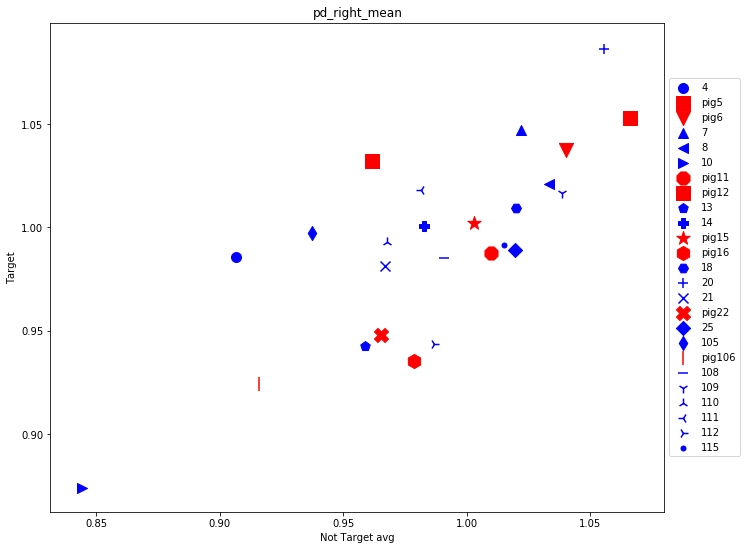

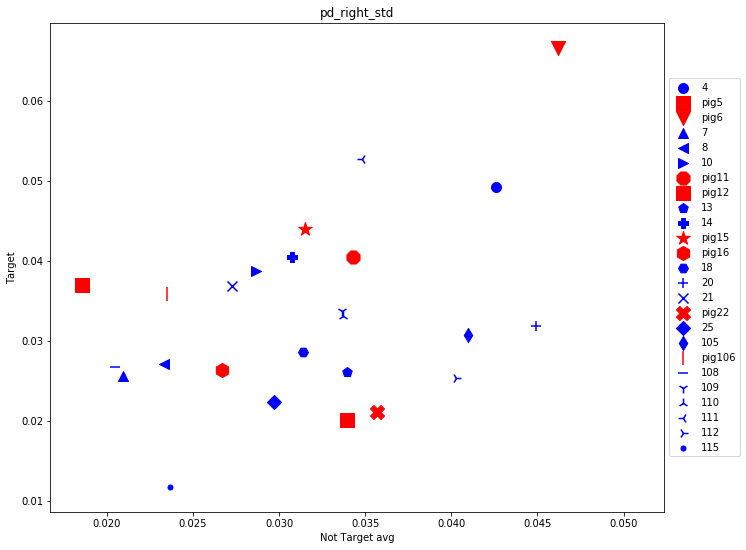

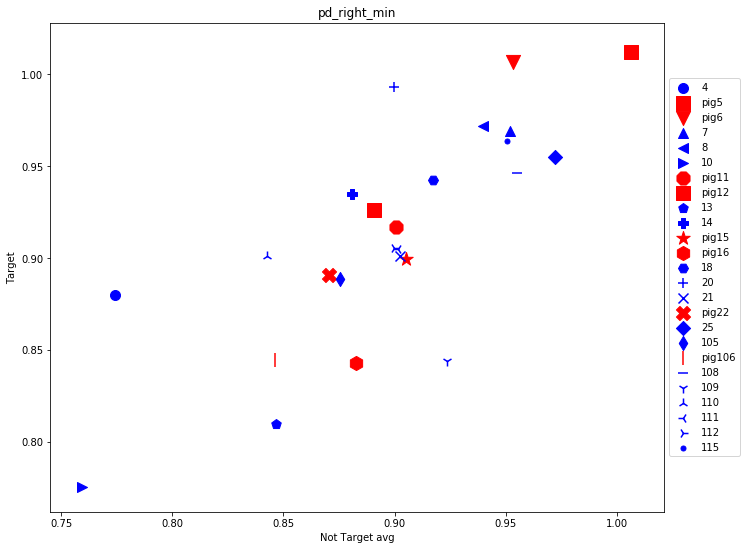

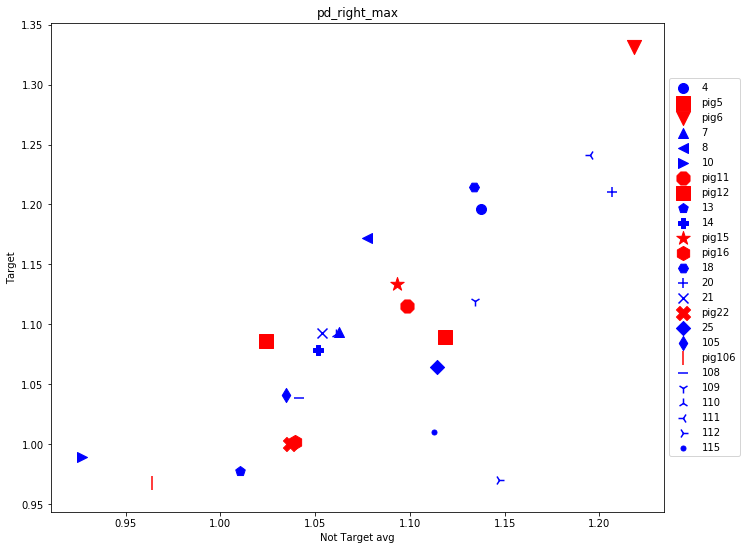

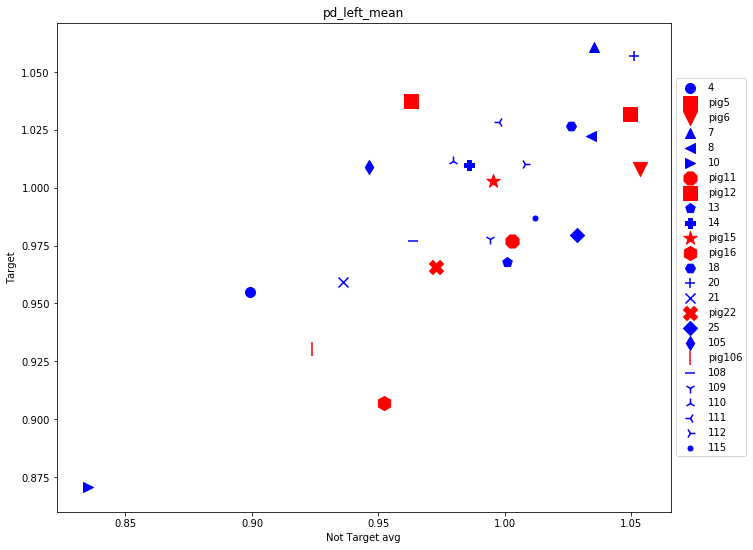

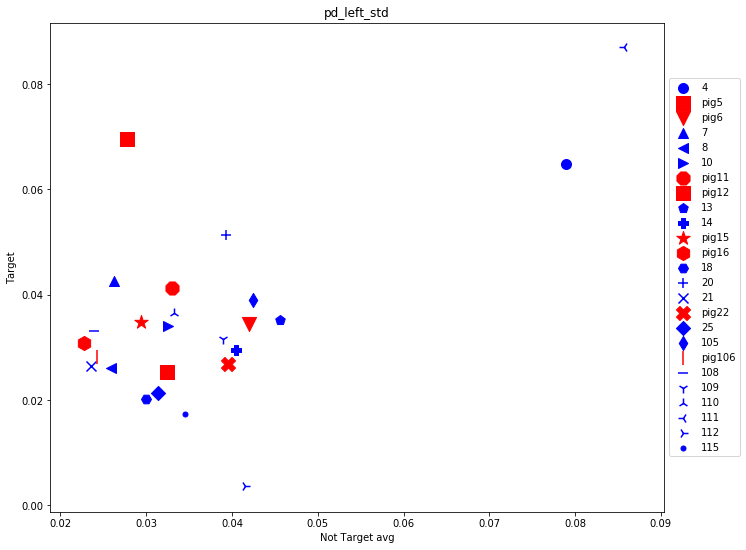

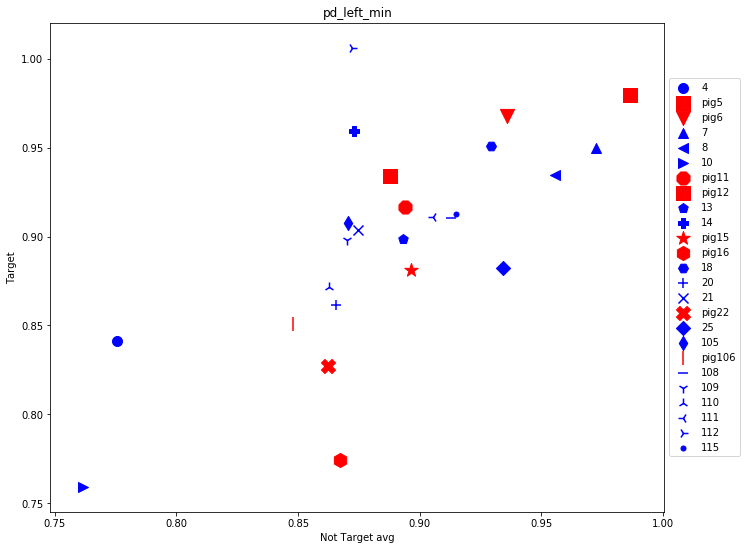

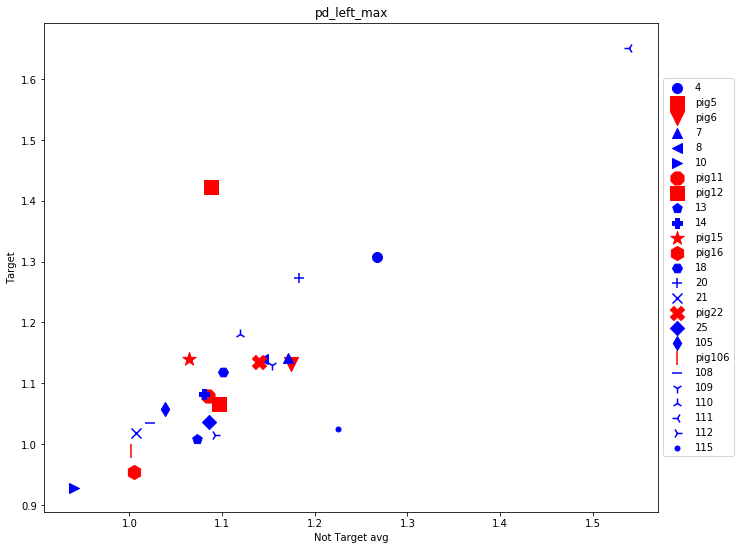

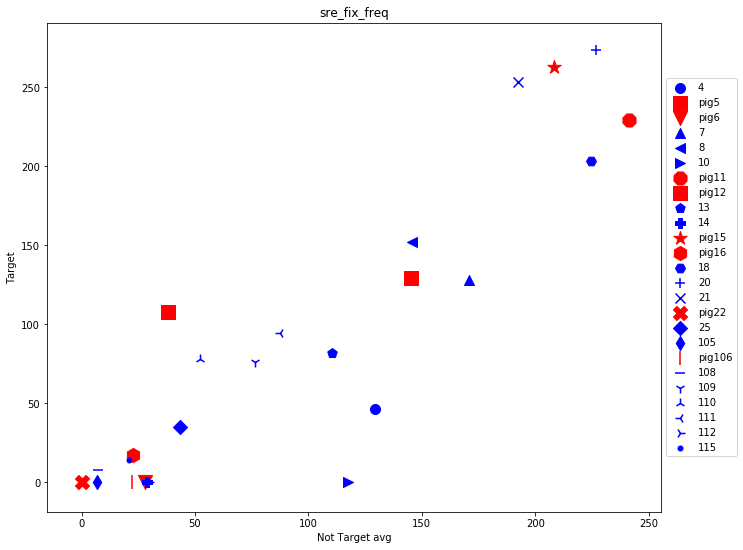

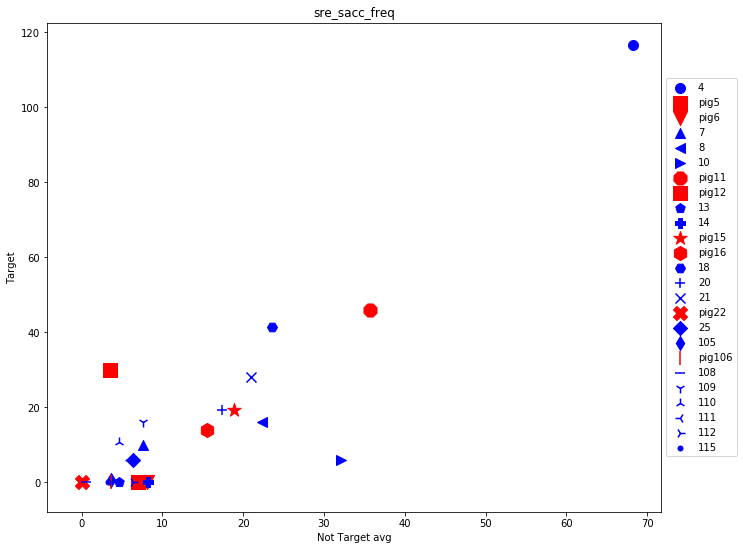

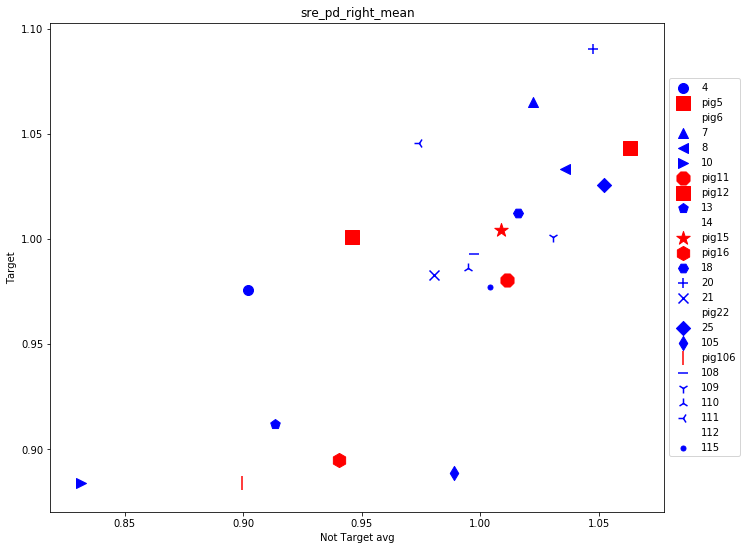

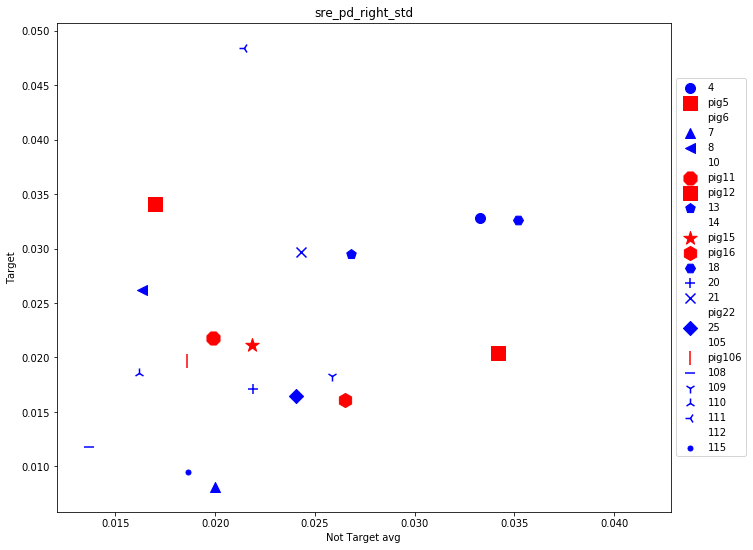

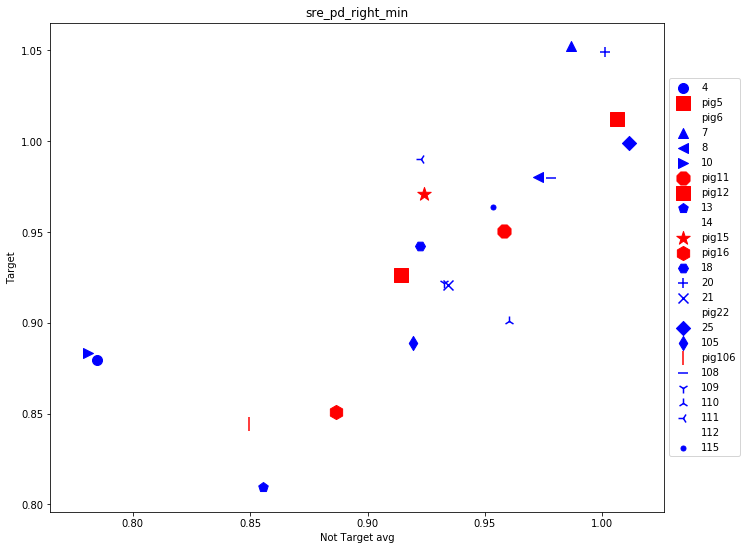

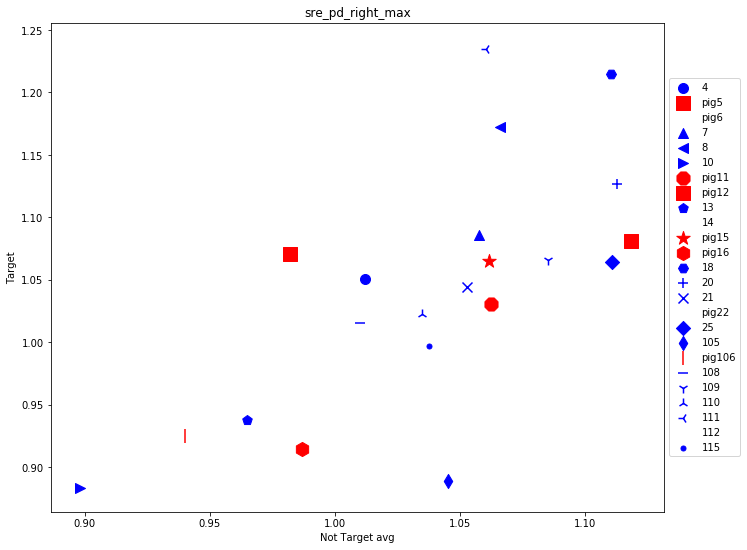

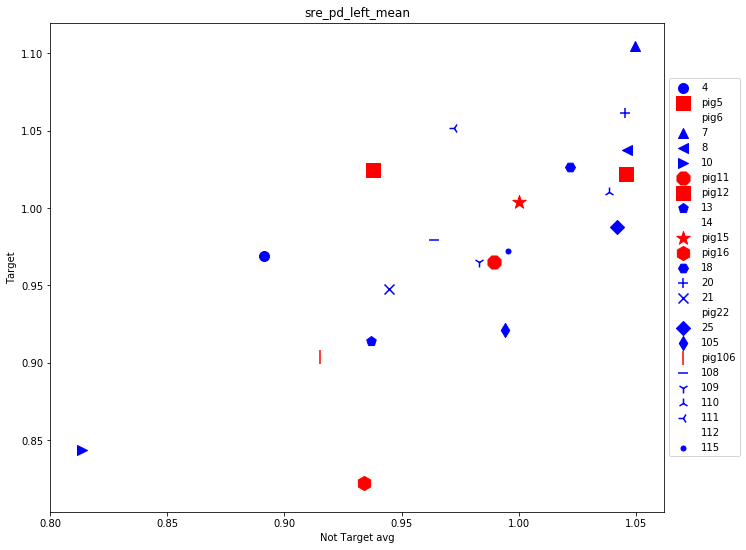

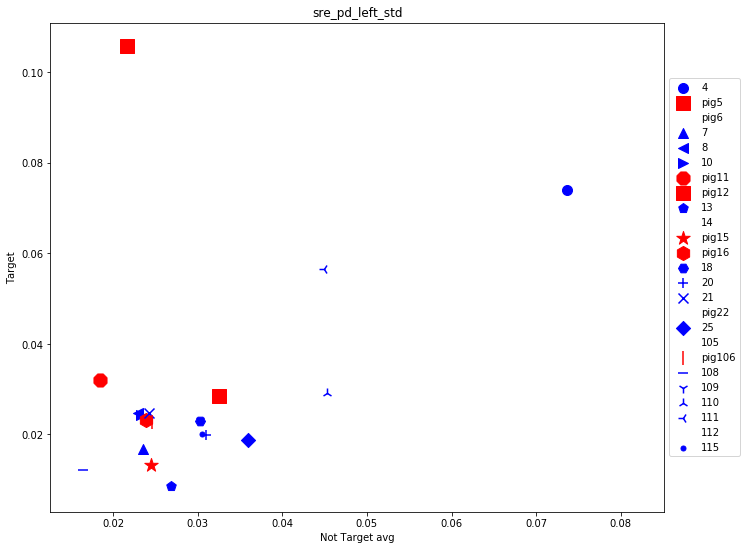

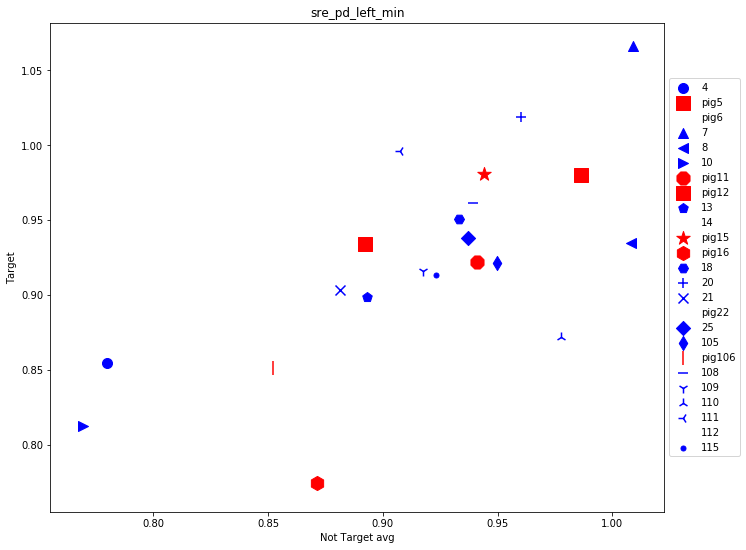

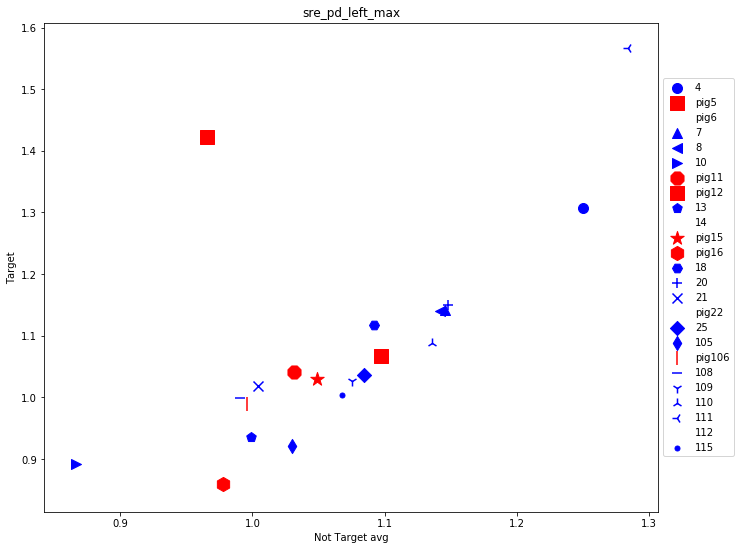

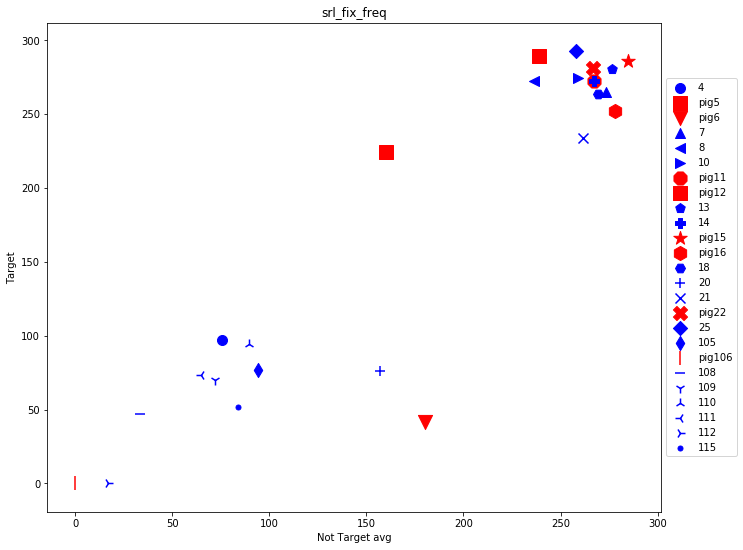

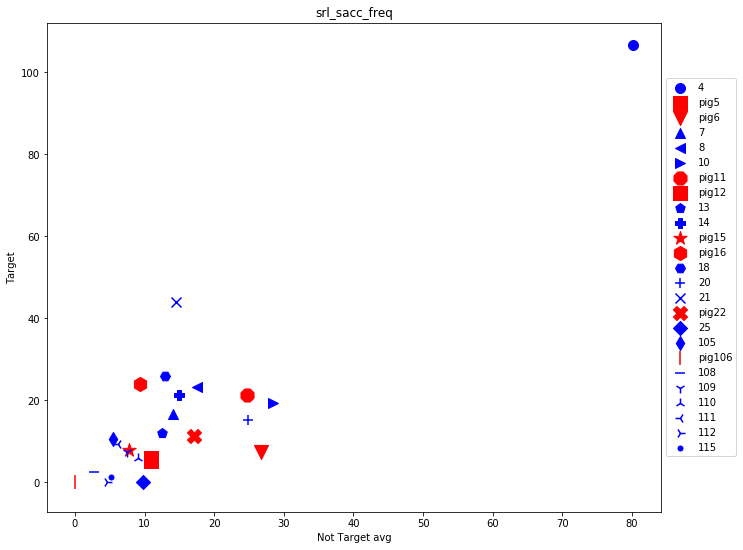

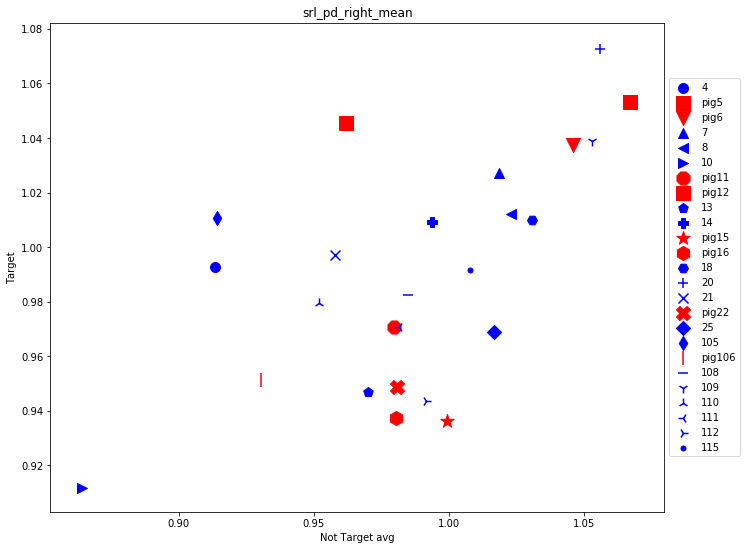

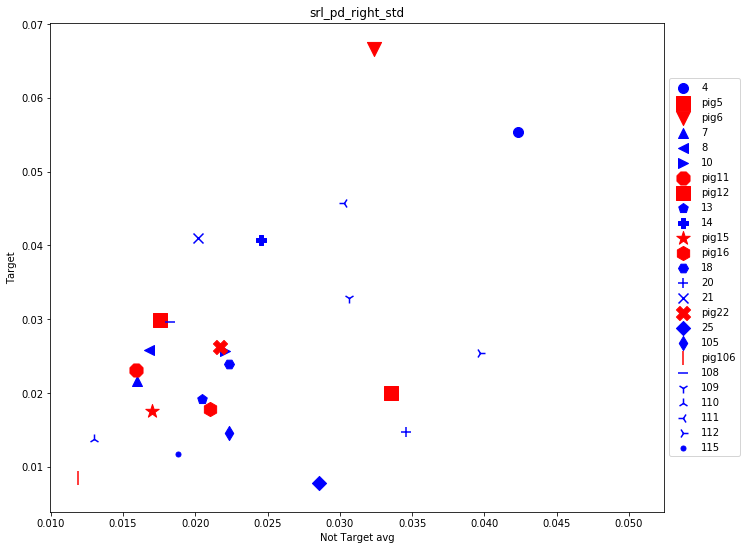

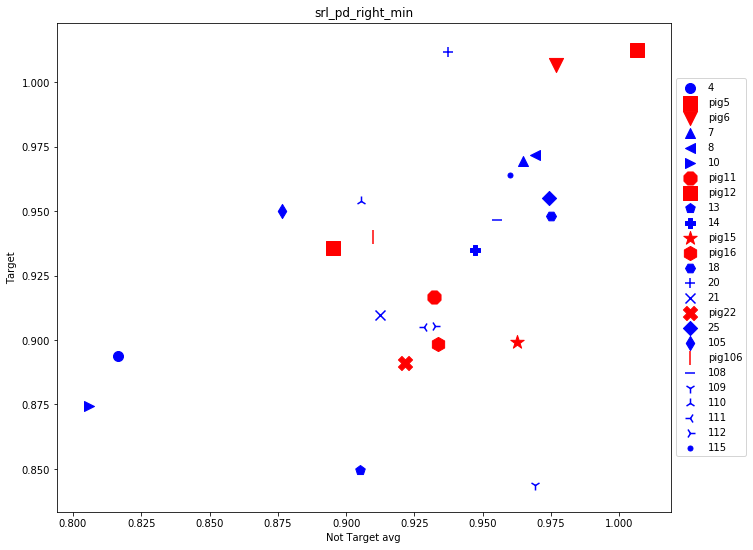

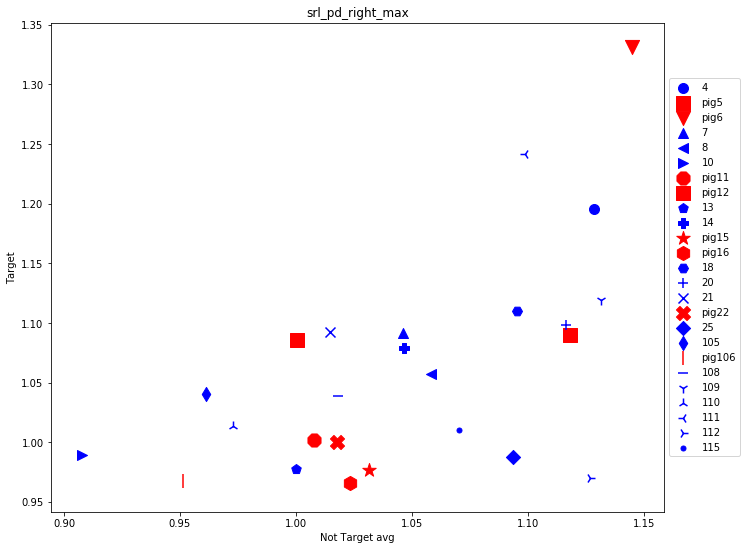

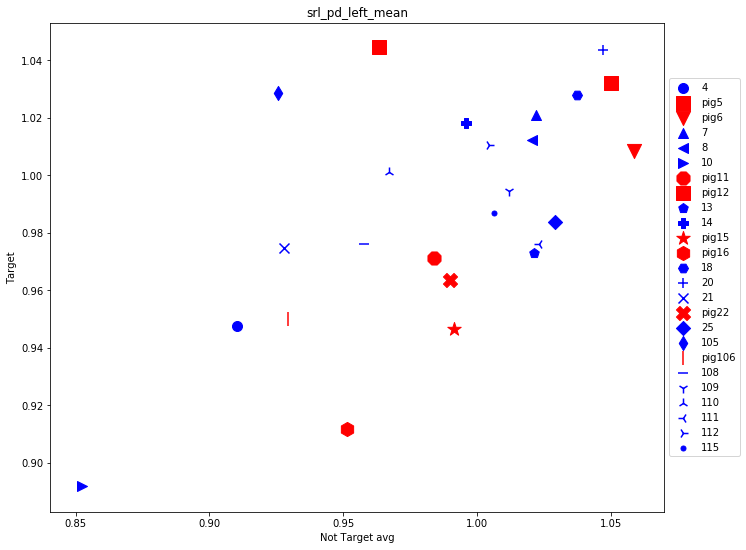

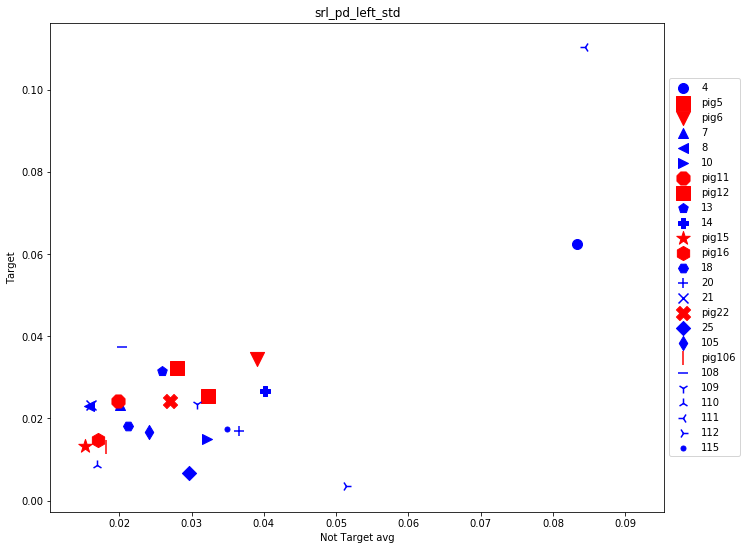

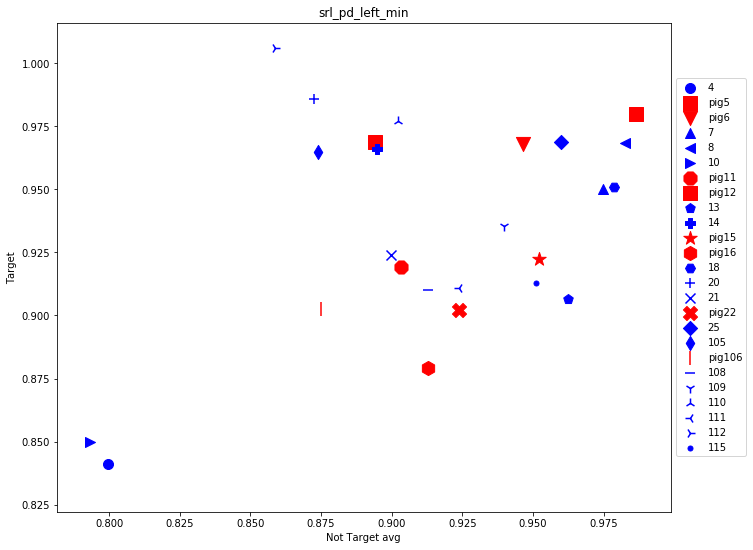

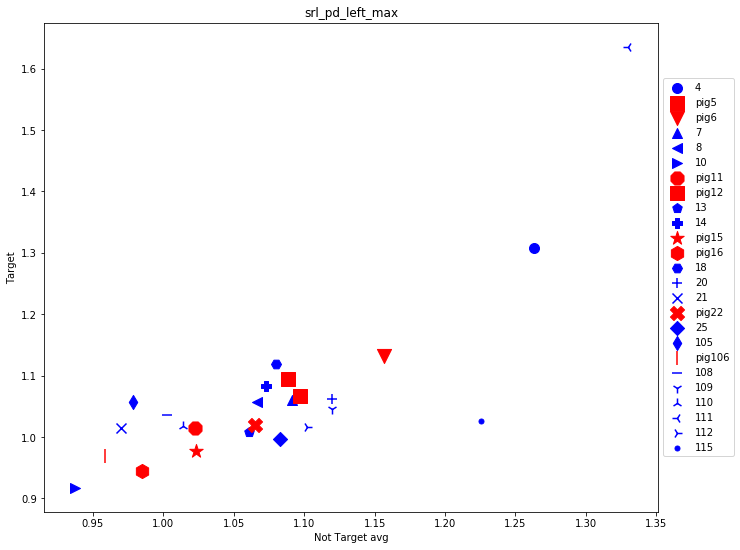

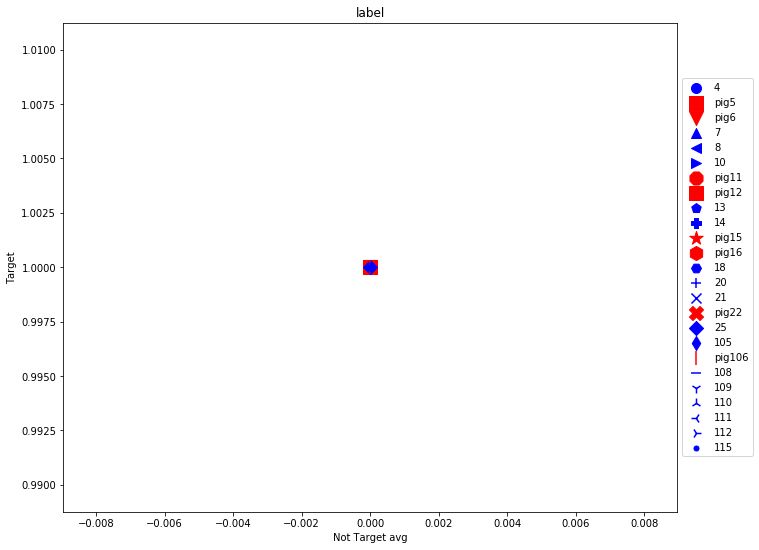

In [29]:

for f in feat_cols:
    fig, axs = plt.subplots(1, figsize=(11, 9))
    labels = []
    for i, sub in enumerate(subjects):
        axs.set_title("{}".format(f))
        axs.set_xlabel("Not Target avg")
        axs.set_ylabel("Target")
        axs.set_label("{}".format(sub))

        if(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "pig"):
            size=200
            color = "r"
            labels.append("pig{}".format(sub))
        else:
            size=100
            color = "b"
            labels.append("{}".format(sub))

        axs.scatter(aggrZeros.loc[aggrZeros['subject'] == sub][f],
                    aggrOnes.loc[aggrOnes['subject'] == sub][f],
                    s=size,
                    c=color,
                    marker=markers[i])    
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig("plots/{}/sub_nTvsT_{}".format(mode, f))


plt.show()
#axs[c].scatter(zeros["subject"], zeros[col], s=60, c="b", marker=".")


In [30]:
# Aggregate by card

def aggregateByCard(card, aggrZeros, aggrOnes):
    data = features[plot_column_names].loc[features['card_class'] == card]
    
    zeros = data.loc[features['label'] == 0].drop(['card_class'], axis=1)
    ones = data.loc[features['label'] == 1].drop(['card_class'], axis=1)

    w = len(ones.index)
    
    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
        ones[col] = ones[col].mean()
        
    zeros = zeros.head(1)
    zeros['card_class'] = card
    
    ones = ones.head(1)
    ones['card_class'] = card

    aggrZeros = aggrZeros.append(zeros, ignore_index=True)
    aggrOnes = aggrOnes.append(ones, ignore_index=True)
    
    return aggrZeros, aggrOnes, w
    

cZ = pd.DataFrame(columns=plot_column_names)
cO = pd.DataFrame(columns=plot_column_names)
weights = []

for card in card_names:
    cZ, cO, w= aggregateByCard(card, cZ, cO)
    weights.append(w)

card_weights = dict(zip(card_names, weights))

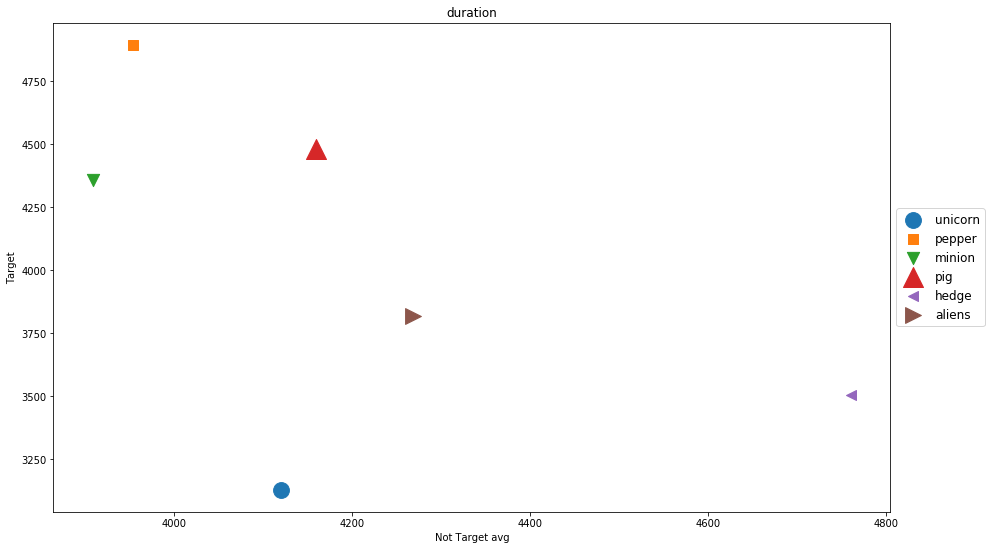

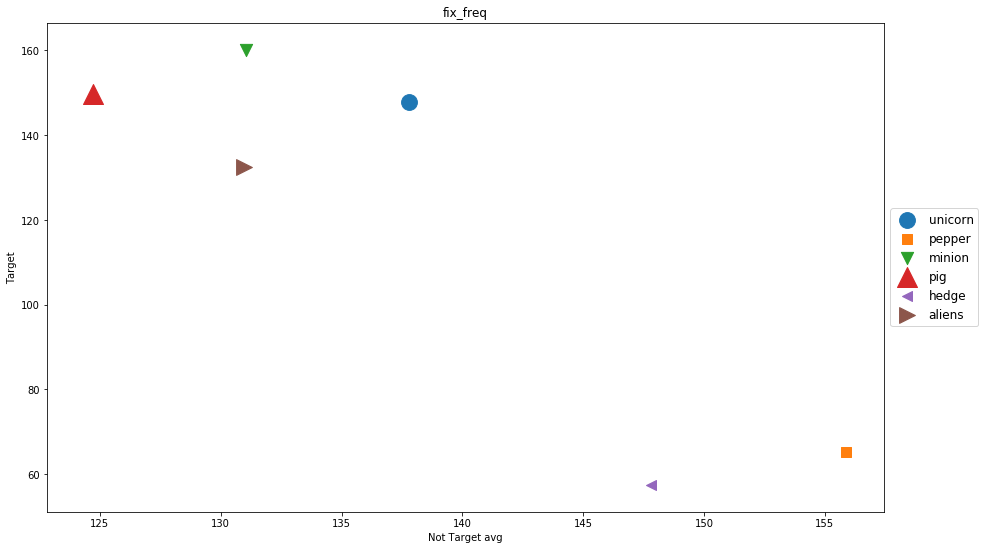

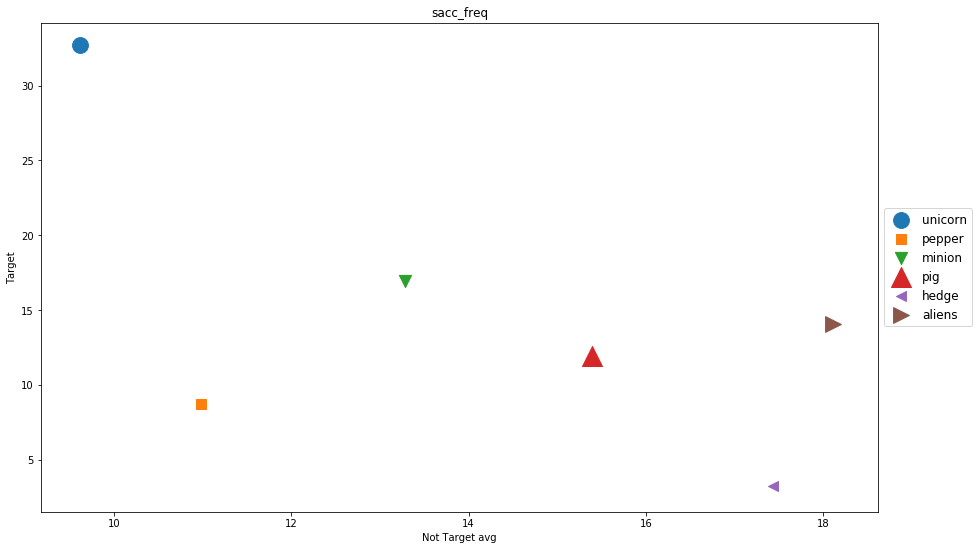

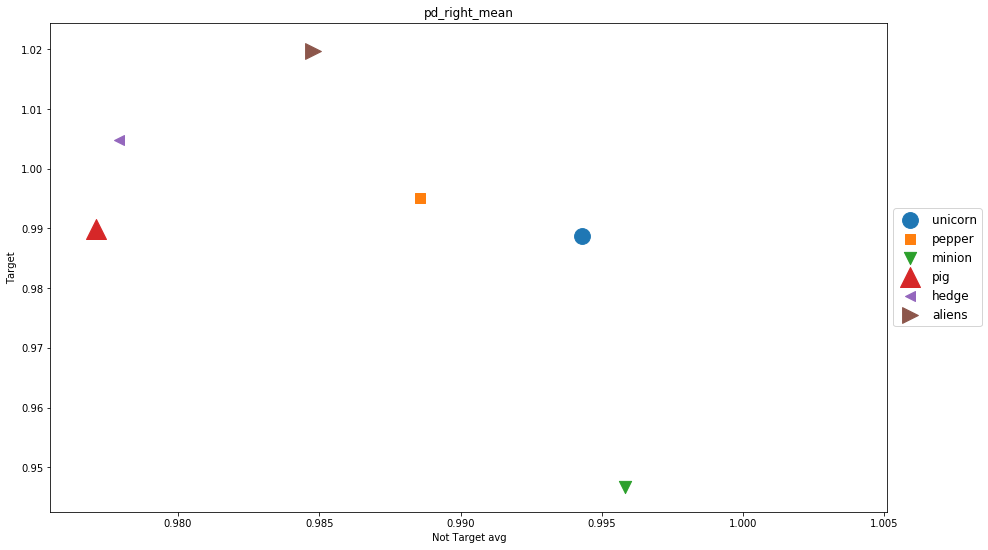

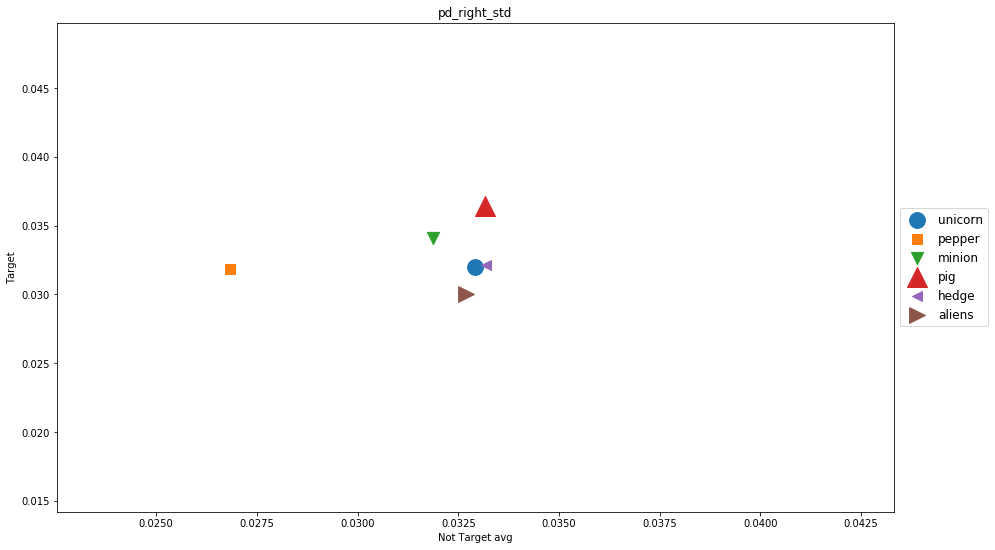

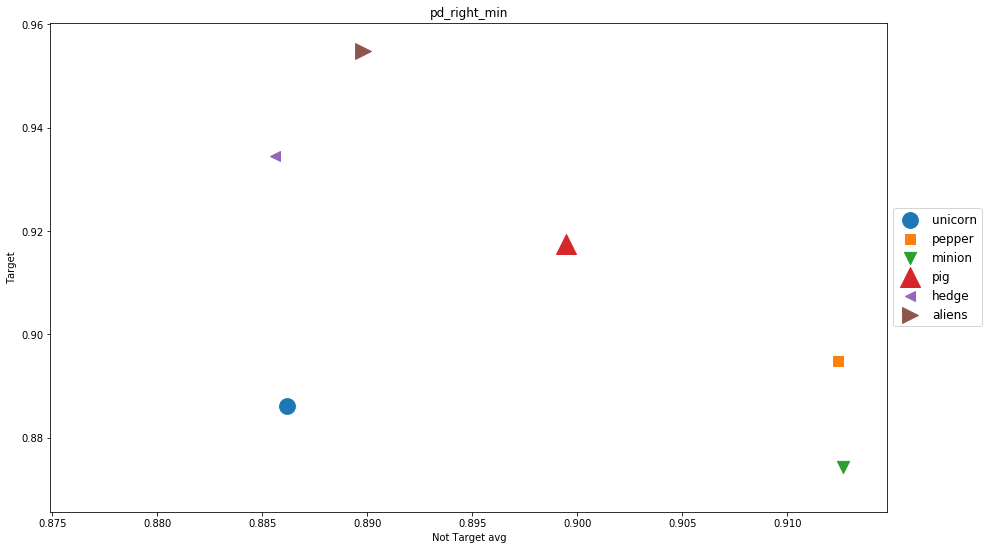

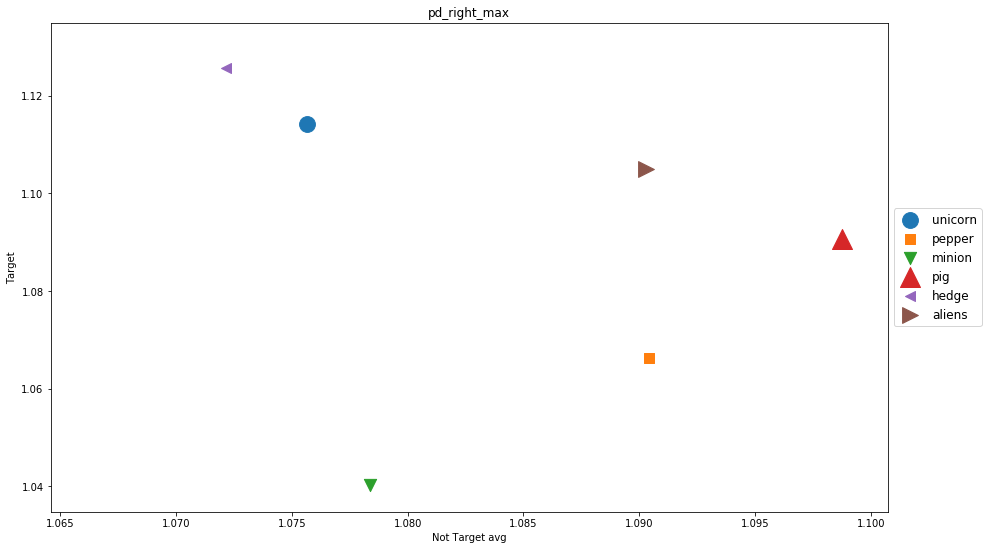

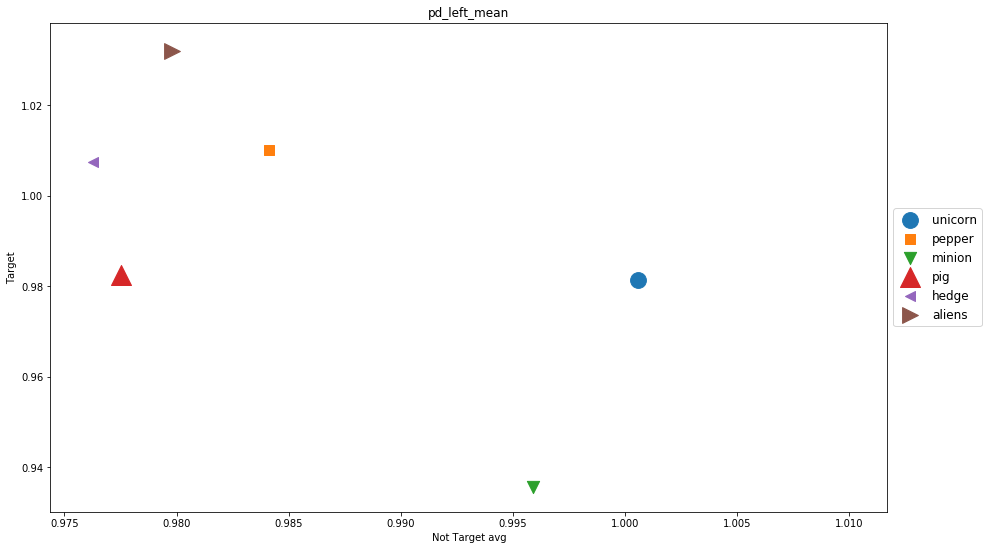

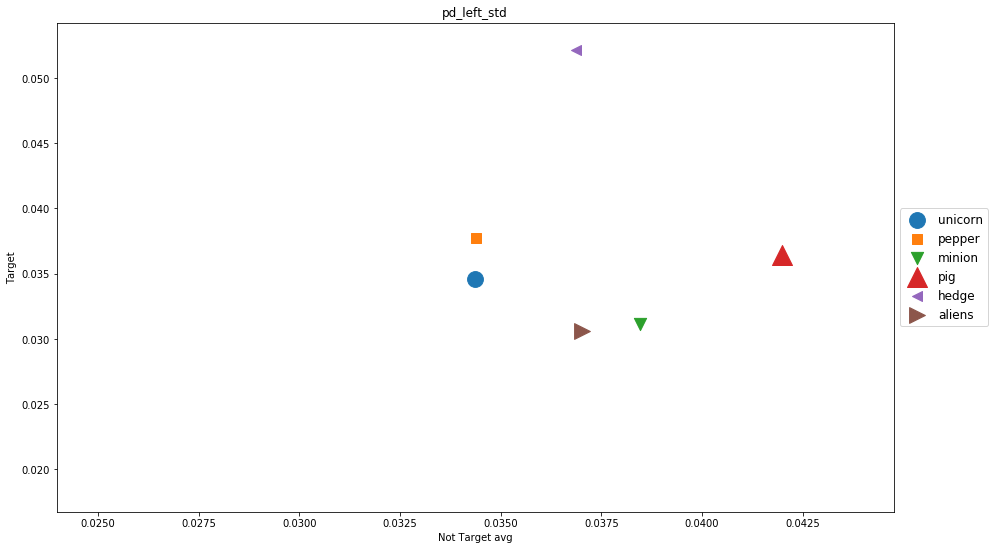

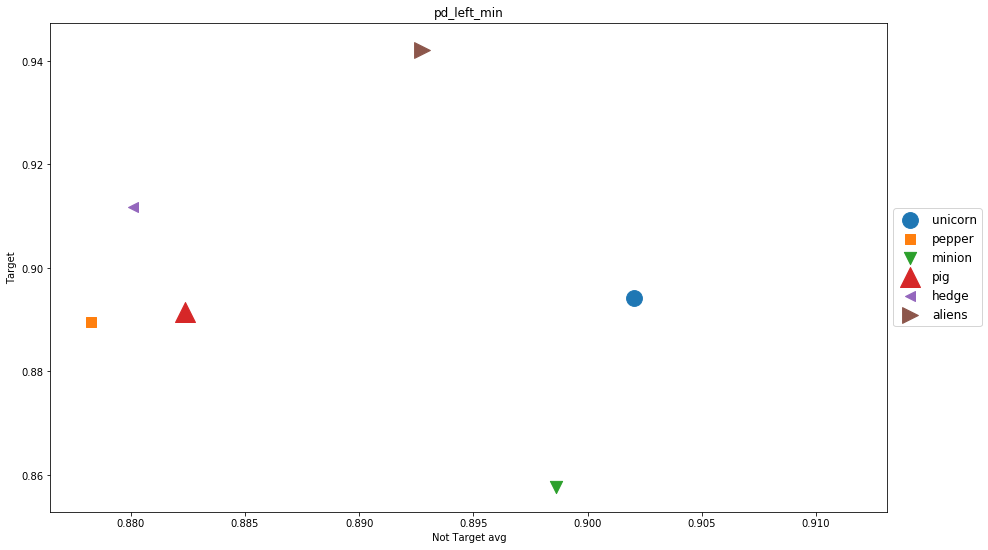

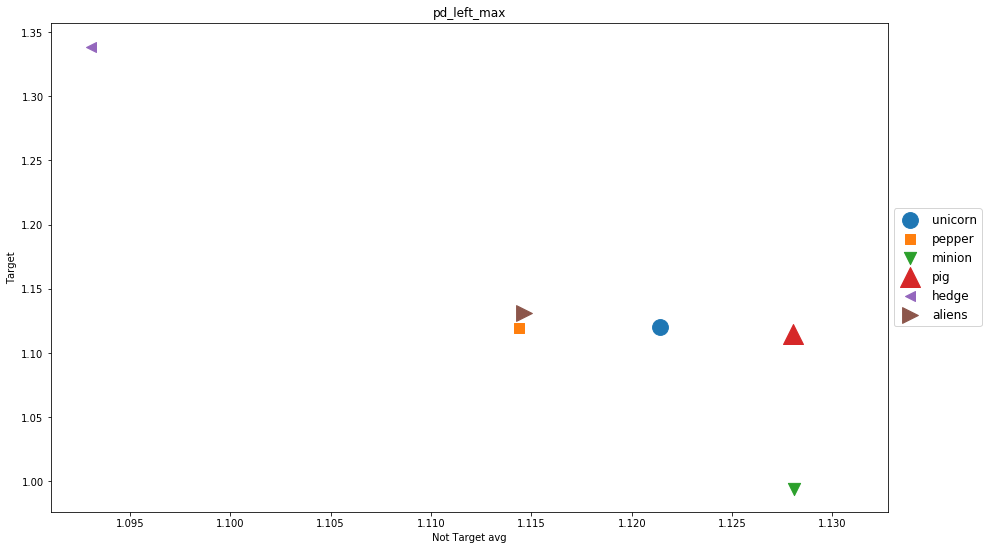

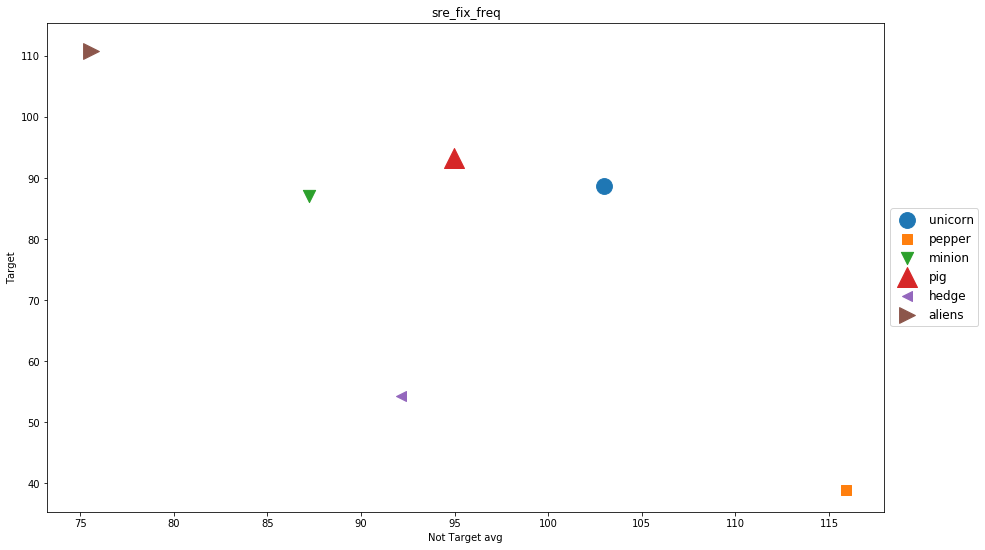

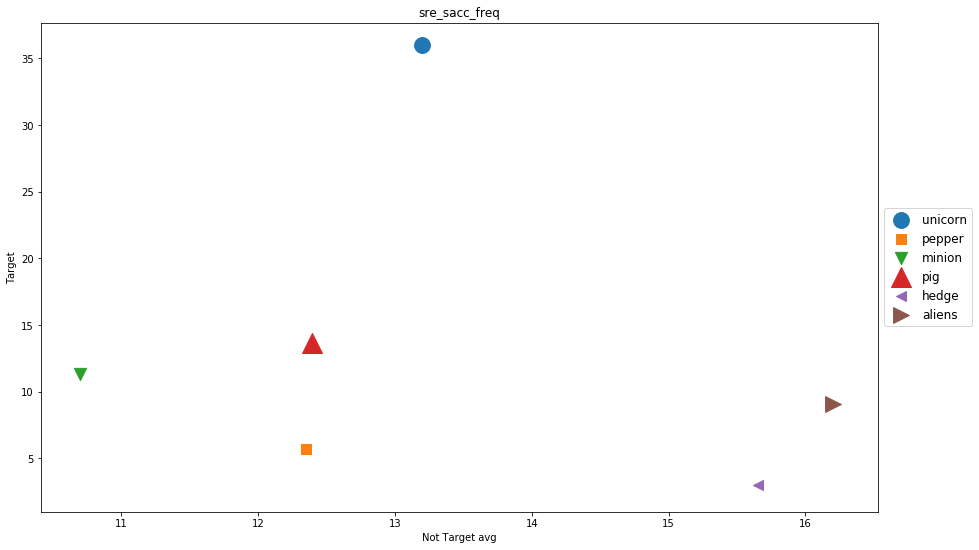

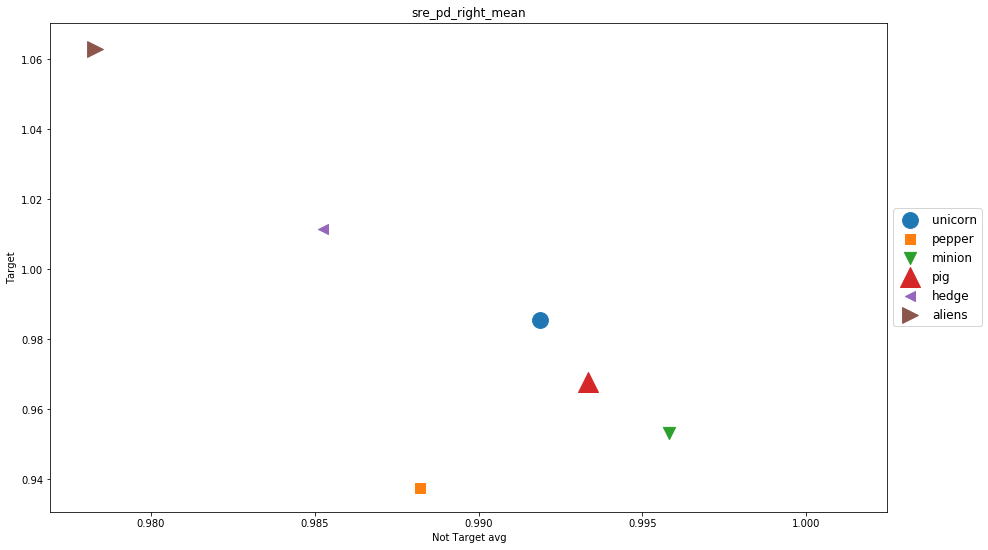

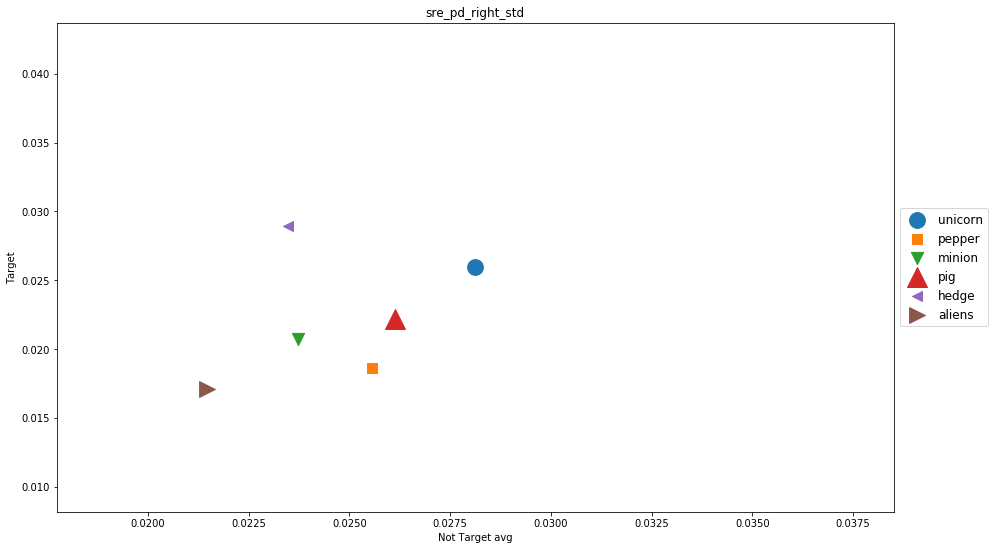

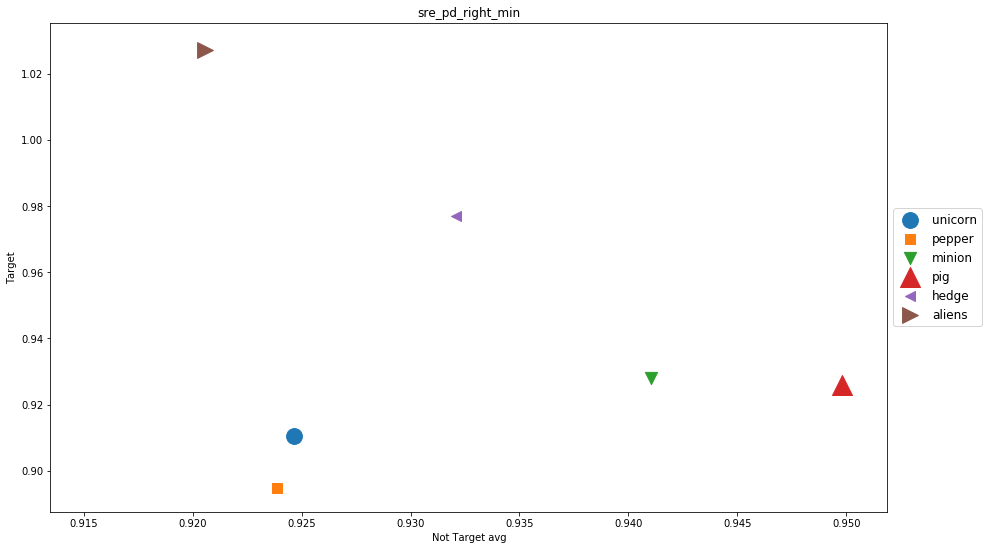

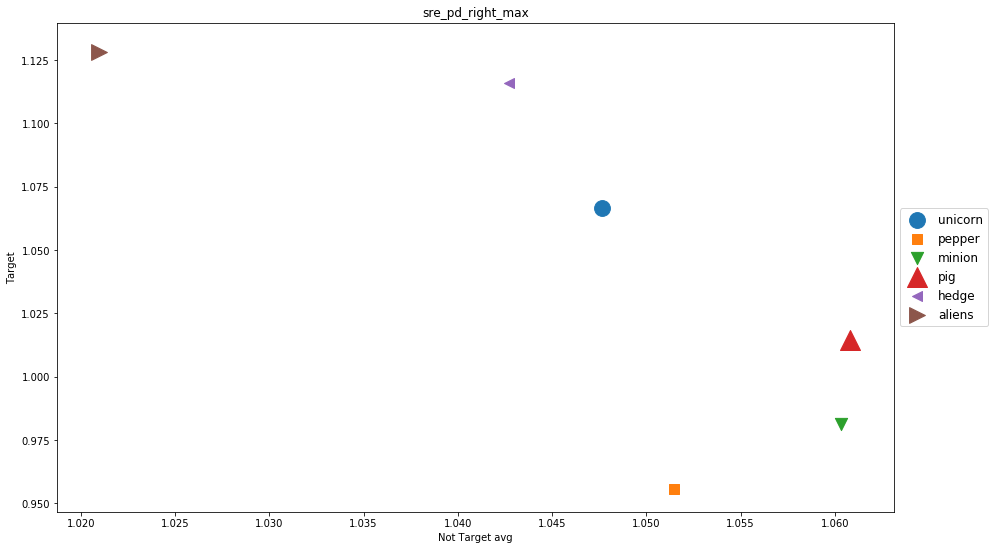

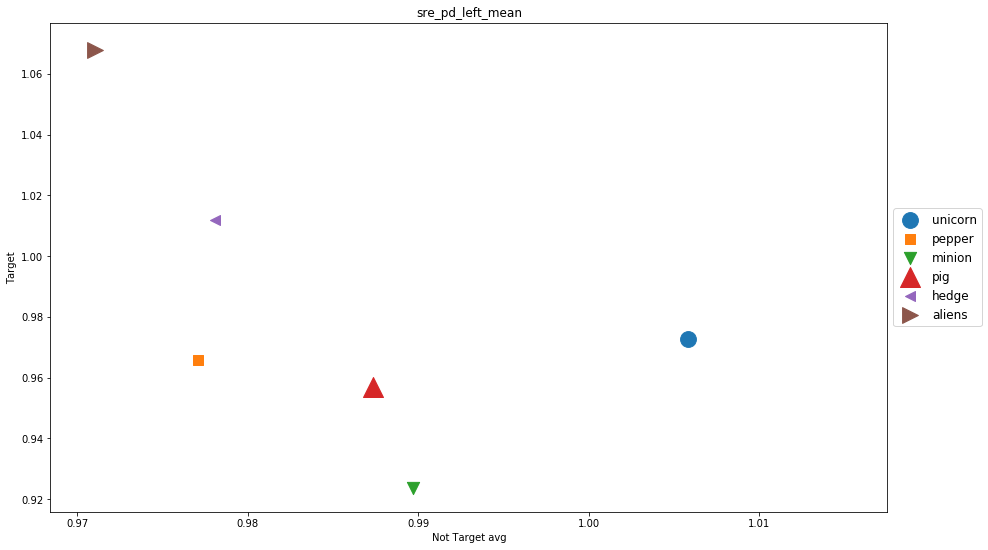

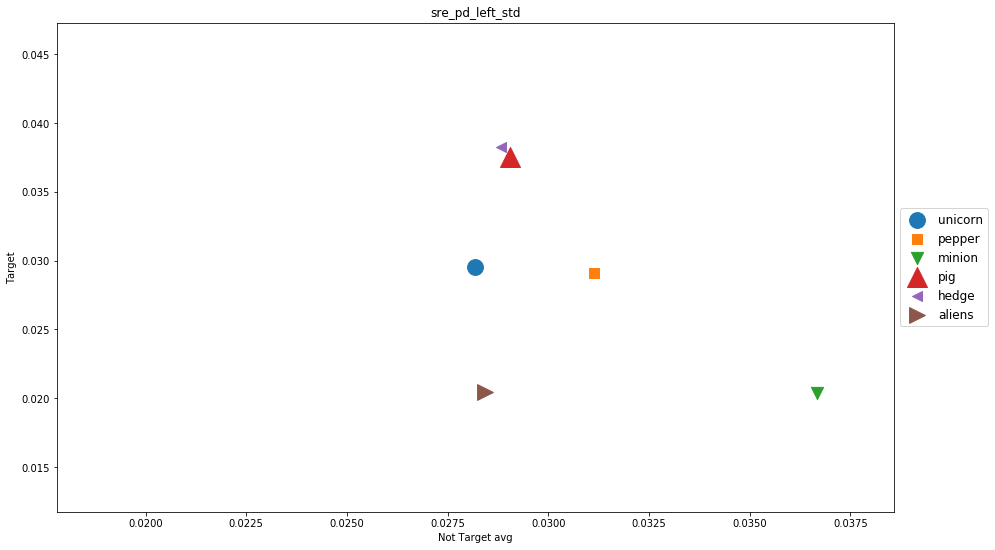

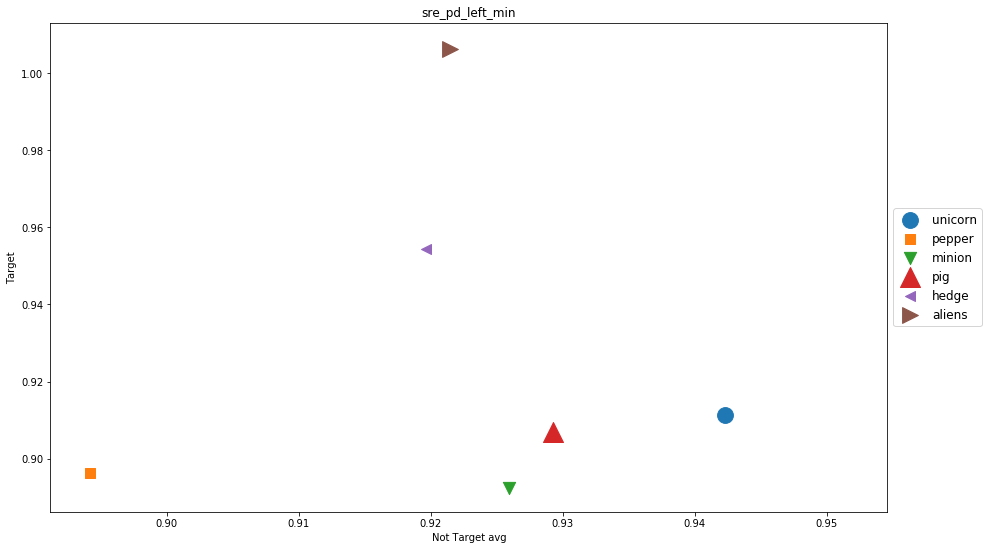

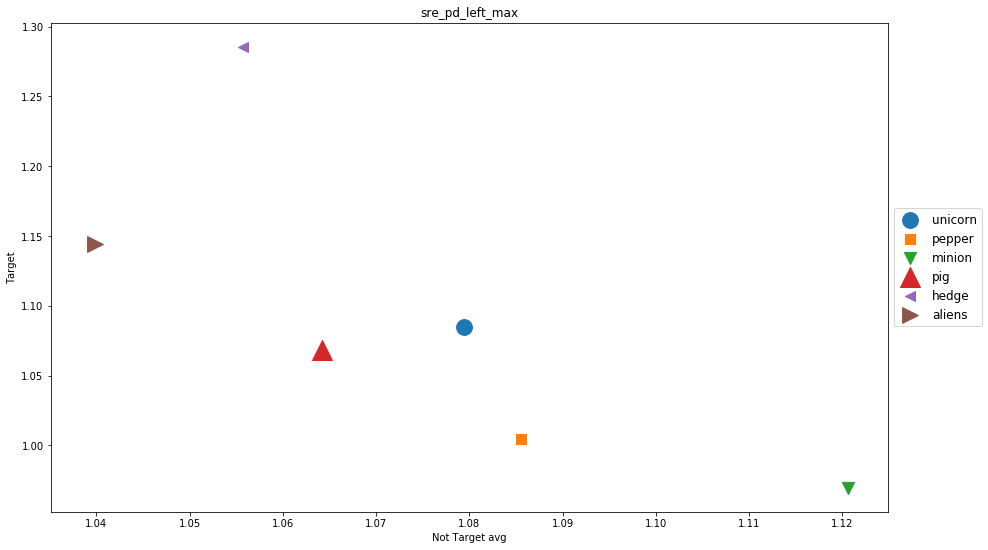

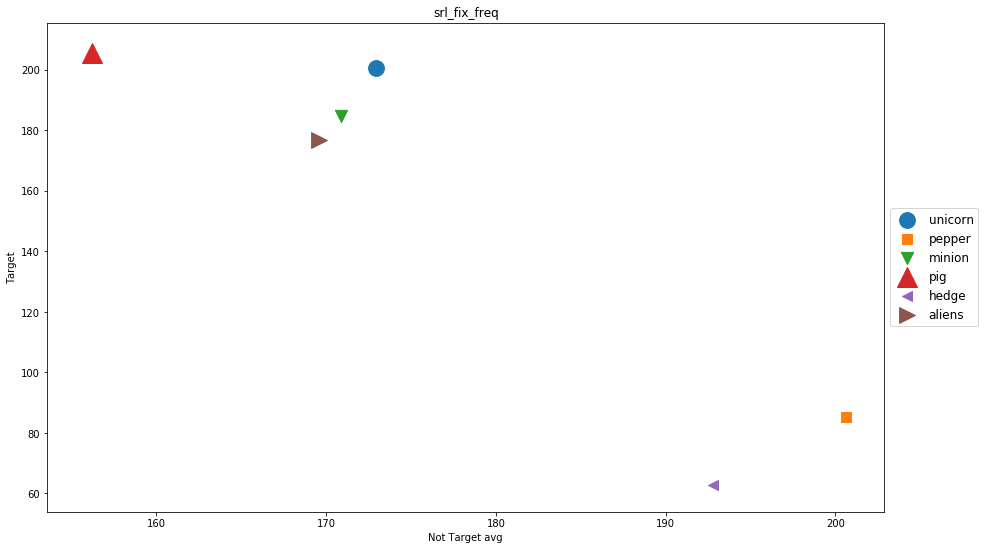

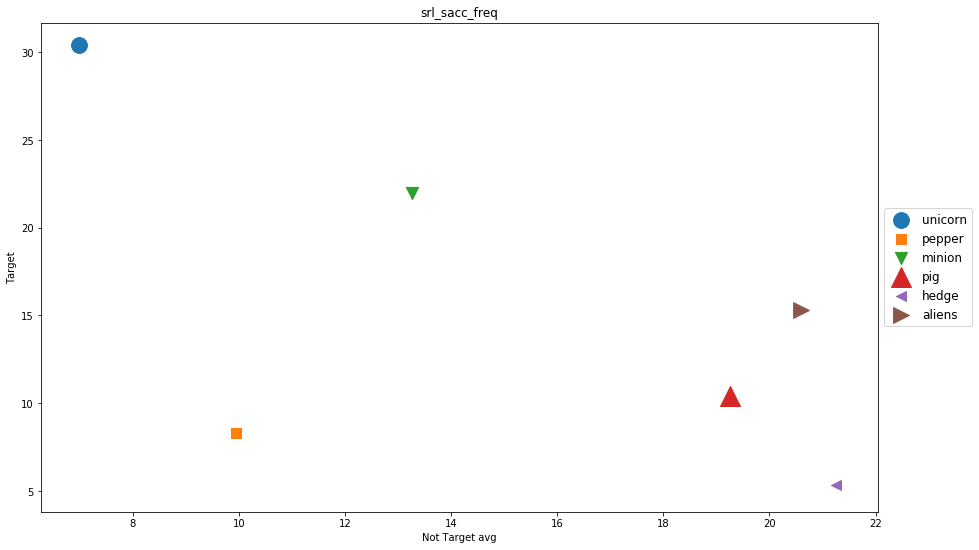

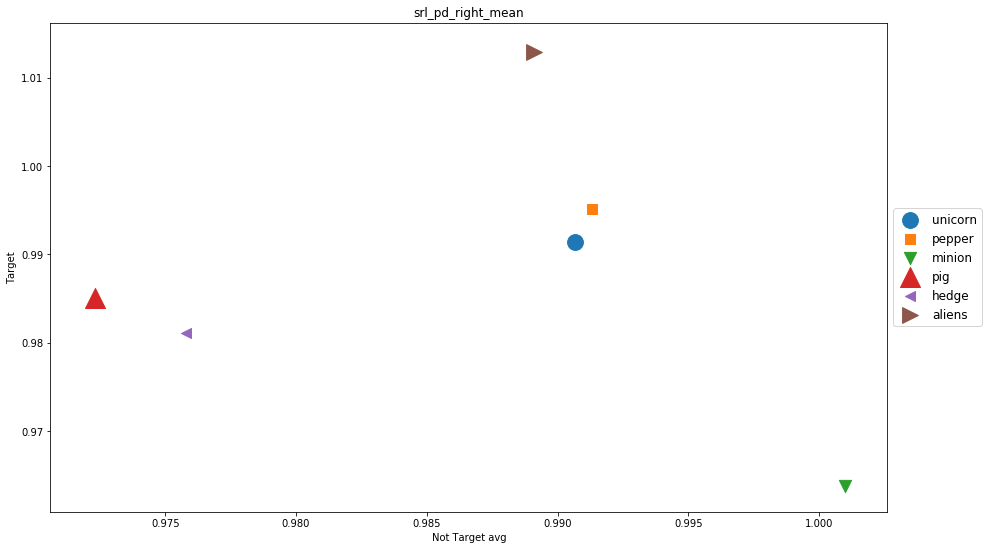

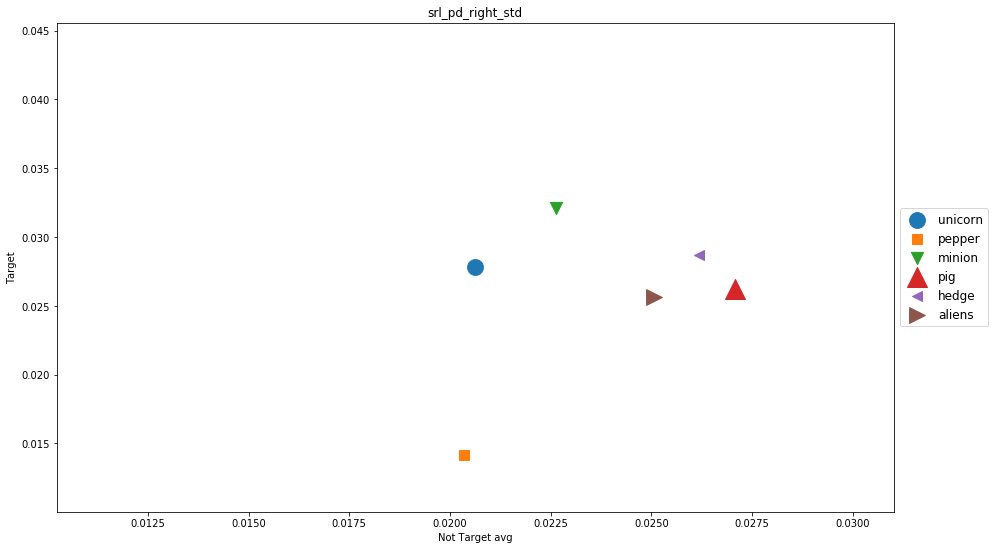

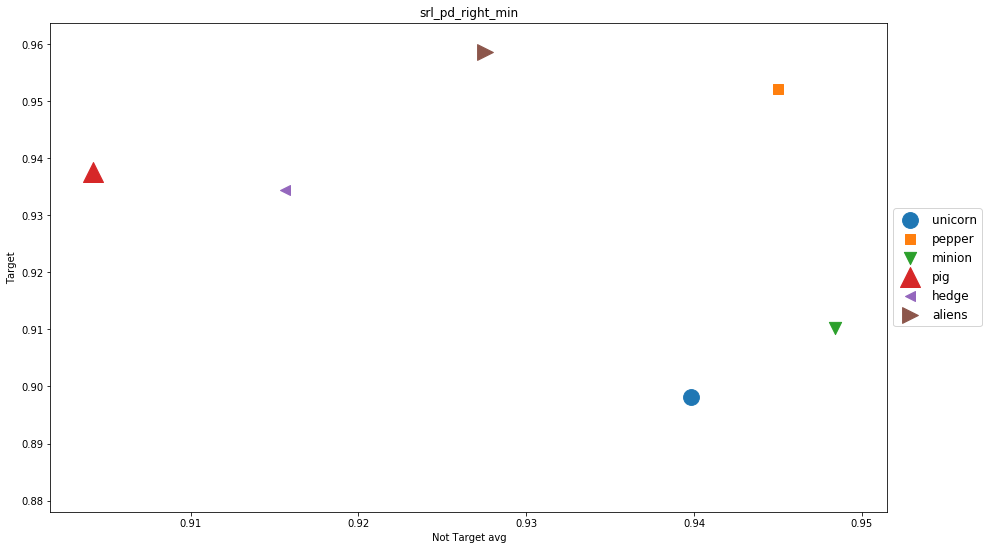

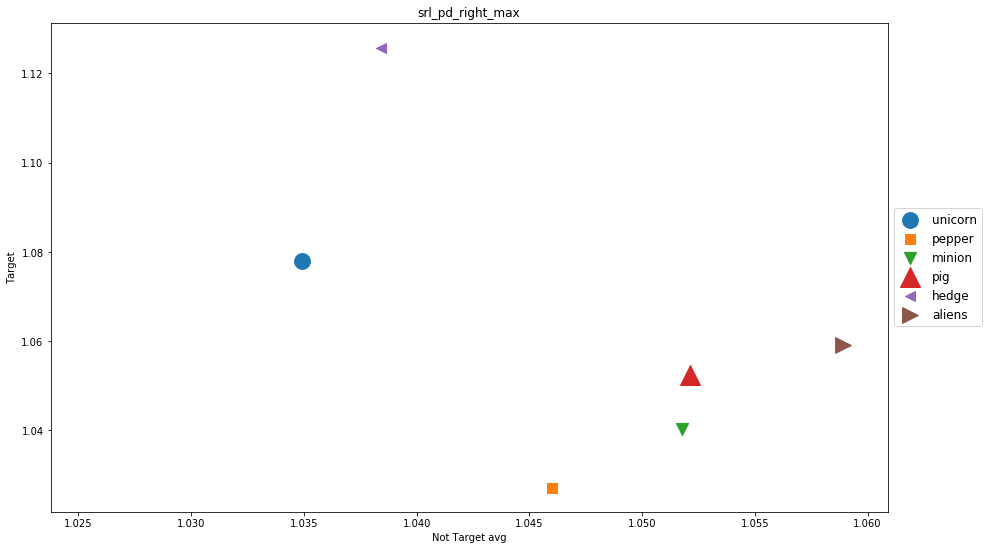

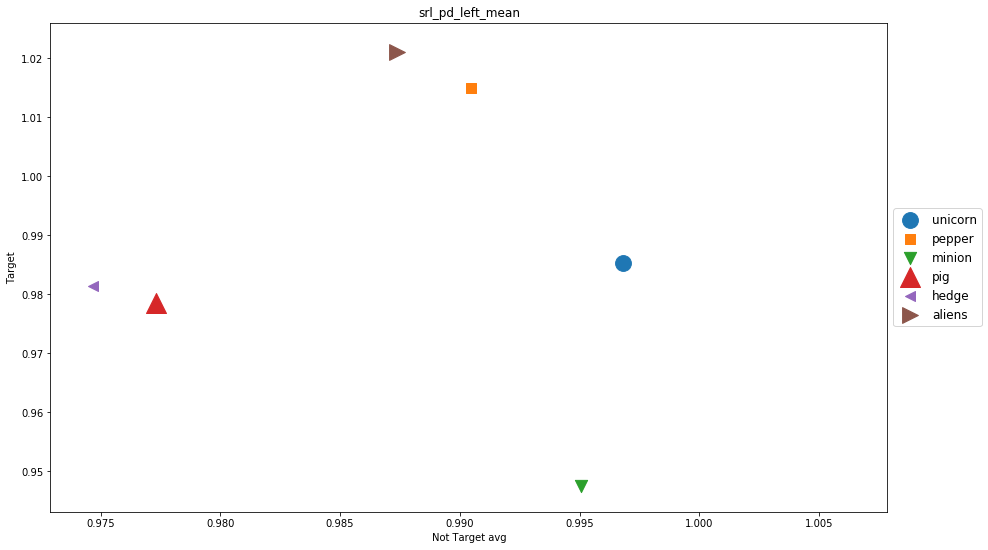

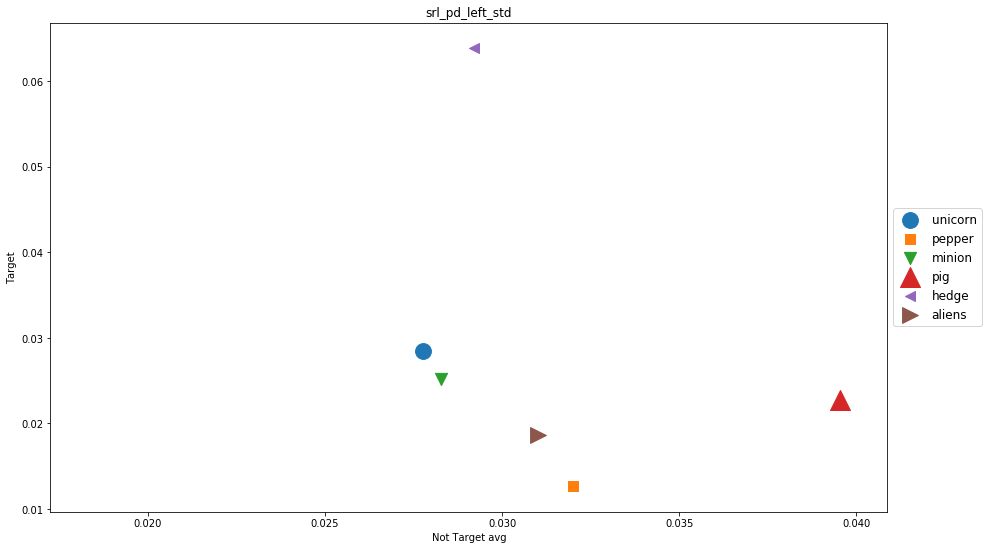

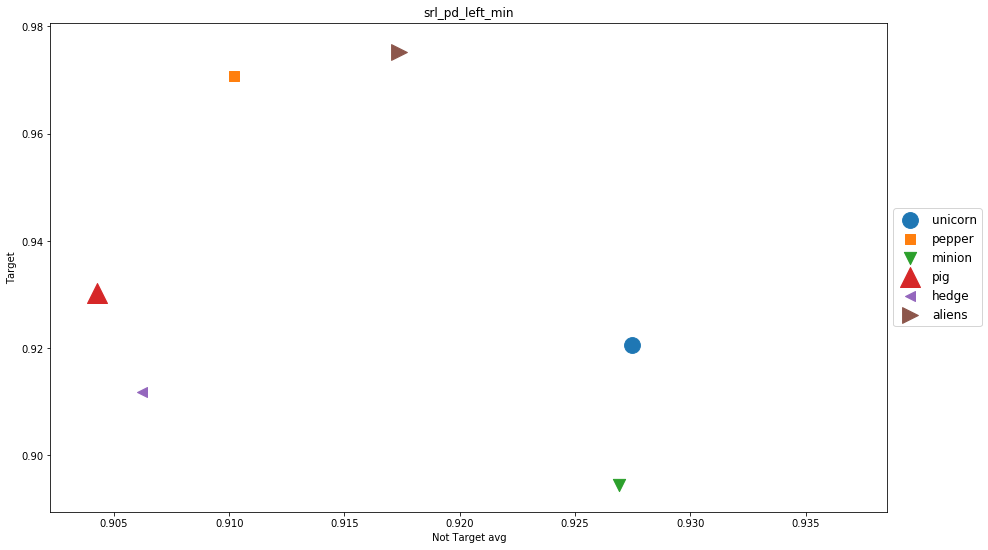

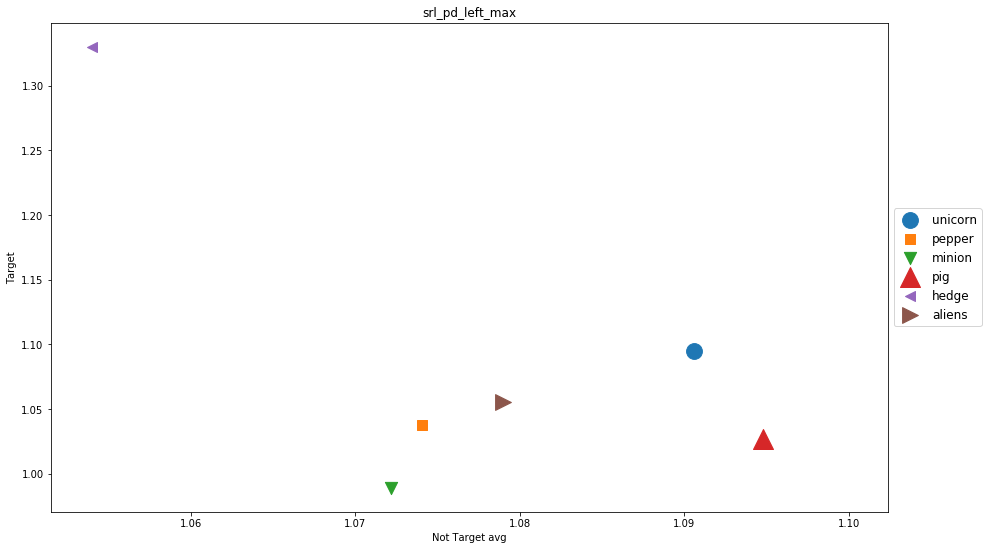

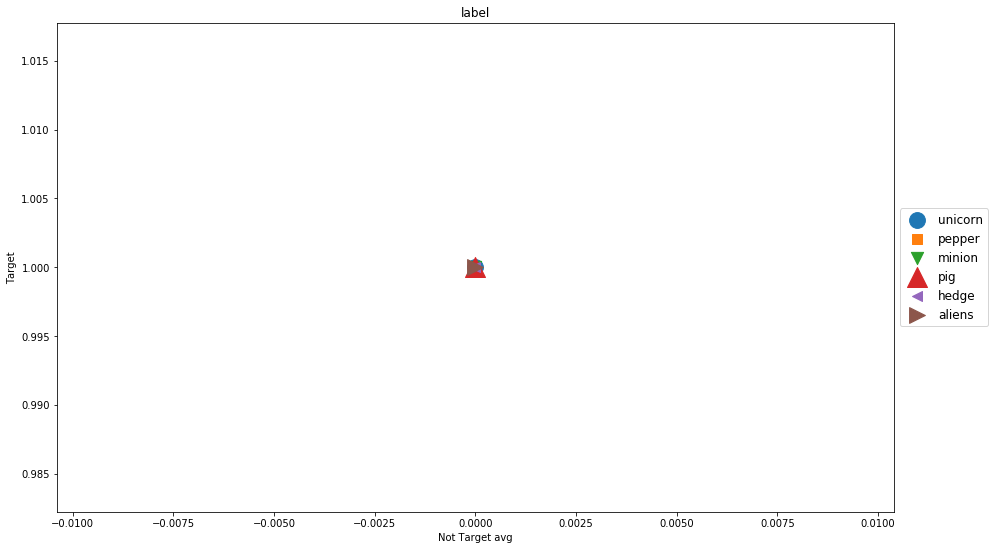

In [31]:
for f in feat_cols:
    fig2, axs2 = plt.subplots(1, figsize=(15, 9))
    labels = []
    
    for c, card in enumerate(card_names):
        axs2.set_title("{}".format(f))
        axs2.set_xlabel("Not Target avg")
        axs2.set_ylabel("Target")
        axs2.set_label("{}".format(sub))
        
        size = card_weights[card] * 50
        if(card == "pig"):
            color = 'r'
        else:
            color = 'b'
        
        axs2.scatter(cZ.loc[cZ['card_class'] == card][f],
                    cO.loc[cO['card_class'] == card][f],
                    s=size,
                    marker=markers[c])    
        
    plt.legend(card_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'large')
    fig2.savefig("plots/{}/card_nTvsT_{}".format(mode, f))
    
plt.show()